<a href="https://colab.research.google.com/github/darren96483/Math-Modeling-2025/blob/main/Sample_Problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

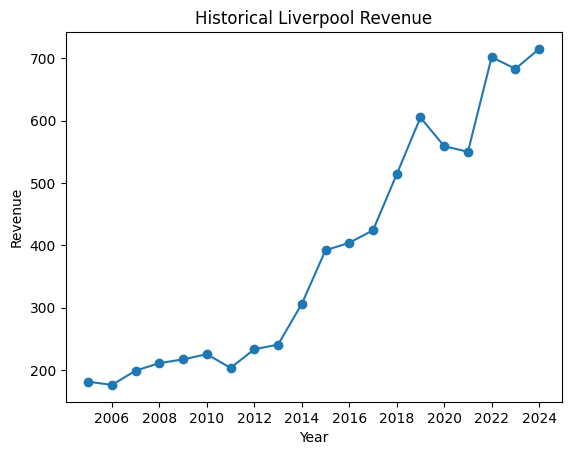

ADF Statistic Test1: 1.1718830336428063
ADF P-Value Test1: 0.9957857464581867
ADF Statistic Test 2: -4.336366174870262
ADF P-Value Test 2: 0.000384027120151785


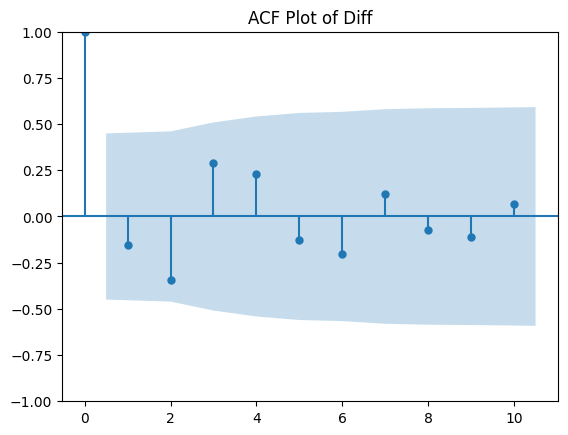

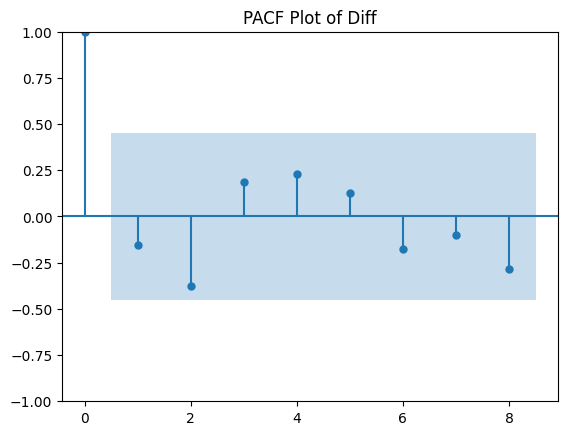

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model 1 AIC: 210.89572020629902
Model 2 AIC: 196.21357608850244
Model 3 AIC: 209.9045672307037
Model 4 AIC: 211.22504460125492
Model 5 AIC: 212.81220376031308


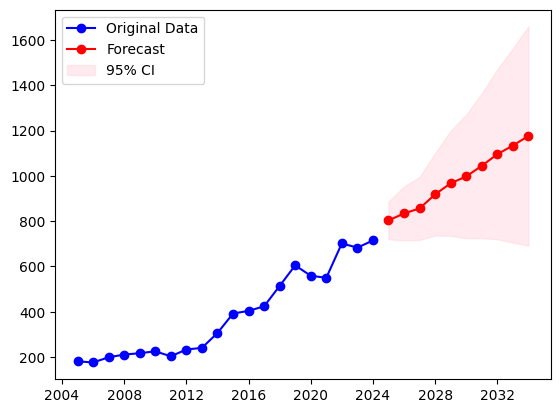

10-Year Revenue Forecast:
      Forecast (M)  Lower Bound (M)  Upper Bound (M)
Year                                                
2025         803.5            720.0            887.0
2026         834.2            715.1            953.3
2027         856.4            717.2            995.6
2028         918.5            736.7           1100.3
2029         967.5            735.5           1199.4
2030         997.7            724.9           1270.4
2031        1044.6            725.0           1364.3
2032        1095.6            720.6           1470.7
2033        1134.3            705.4           1563.2
2034        1176.1            692.3           1660.0


In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

data = {
    'Year': [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
             2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    'Revenue': [181.2, 176, 198.9, 210.9, 217, 225.3, 203.3, 233.2, 240.6, 306,
                392, 404, 424, 514, 605, 559, 550, 702, 683, 715]
}

# converting data to dataframe + setting index for time series application
liverpool_data = pd.DataFrame(data)
liverpool_data['Year'] = pd.to_datetime(liverpool_data['Year'], format = '%Y')
liverpool_data.set_index('Year', inplace = True)
liverpool_data.index = liverpool_data.index.to_period('Y')

# plotting dataset to see trend
plt.plot(liverpool_data.index.to_timestamp(), liverpool_data['Revenue'], marker = "o")
plt.title("Historical Liverpool Revenue")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.show()

# check if original data is stationary
adftest1 = adfuller(liverpool_data['Revenue'])
print(f"ADF Statistic Test1: {adftest1[0]}")
print(f"ADF P-Value Test1: {adftest1[1]}")

# since original data is not original, differencing is applied
# now checking if differncing makes data stationary
liverpool_data_diff = liverpool_data.diff().dropna()
adftest2 = adfuller(liverpool_data_diff)
print(f"ADF Statistic Test 2: {adftest2[0]}")
print(f"ADF P-Value Test 2: {adftest2[1]}")


# estimating parameters from acf / pacf plots
plot_acf(liverpool_data_diff, lags = 10)
plt.title("ACF Plot of Diff")
plt.show()

plot_pacf(liverpool_data_diff, lags = 8)
plt.title("PACF Plot of Diff")
plt.show()

# creating the arima model
model1 = ARIMA(liverpool_data['Revenue'], order = (1,1,1))
model2 = ARIMA(liverpool_data['Revenue'], order = (2,2,1))
model3 = ARIMA(liverpool_data['Revenue'], order = (1,1,2))
model4 = ARIMA(liverpool_data['Revenue'], order = (2,1,2))
model5 = ARIMA(liverpool_data['Revenue'], order = (2,1,1))

model1_fit = model1.fit()
model2_fit = model2.fit()
model3_fit = model3.fit()
model4_fit = model4.fit()
model5_fit = model5.fit()


print("Model 1 AIC:", model1_fit.aic)
print("Model 2 AIC:", model2_fit.aic)
print("Model 3 AIC:", model3_fit.aic)
print("Model 4 AIC:", model4_fit.aic)
print("Model 5 AIC:", model5_fit.aic)


# predicting 10 years
forecast_steps = 10
forecast_result = model2_fit.get_forecast(steps=forecast_steps)
forecast_values = forecast_result.predicted_mean
confidence_intervals = forecast_result.conf_int()

# creating future index
last_year = liverpool_data.index[-1].year
future_years = pd.period_range(start=str(last_year + 1), periods=forecast_steps, freq='Y')

# plot forecasts
plt.plot(liverpool_data.index.to_timestamp(), liverpool_data['Revenue'], marker='o', color='blue', label='Original Data')
plt.plot(future_years.to_timestamp(), forecast_values, marker='o', color='red', label='Forecast')
plt.fill_between(future_years.to_timestamp(),
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1],
                 color='pink', alpha=0.3, label='95% CI')

plt.legend()
plt.show()

# print results
print("10-Year Revenue Forecast:")
print(pd.DataFrame({
    'Year': future_years.year,
    'Forecast (M)': forecast_values.values.round(1),
    'Lower Bound (M)': confidence_intervals.iloc[:, 0].round(1),
    'Upper Bound (M)': confidence_intervals.iloc[:, 1].round(1)
}).set_index('Year'))